Начать стоит с анализа имеющеегося EXCEL файла и формирования структуры будущей БД 

У нас в наличии две стартовые таблицы

Первая - transaction
transaction_id	\
product_id	\
customer_id	\
transaction_date	\
online_order	\
order_status	\
brand	\
product_line	\
product_class	\
product_size	\
list_price	\
standard_cost \

Вторая - customers \ 
customer_id	- а \
first_name	\
last_name	\
gender	\
DOB	\
job_title	\
job_industry_category	\
wealth_segment	\
deceased_indicator	\
owns_car	\
address	postcode	\
state	\
country	\
property_valuation \

Далее попробуем построить БД исходя из принципа - сделаем две базовые витрины (transaction и customers соответсвенно)
и к ним справочники, которые  будут иметь либо index (primary key,foreign key) 
либо просто дублирующее поле, чтобы делать join прям по тексту 

визуализируем \

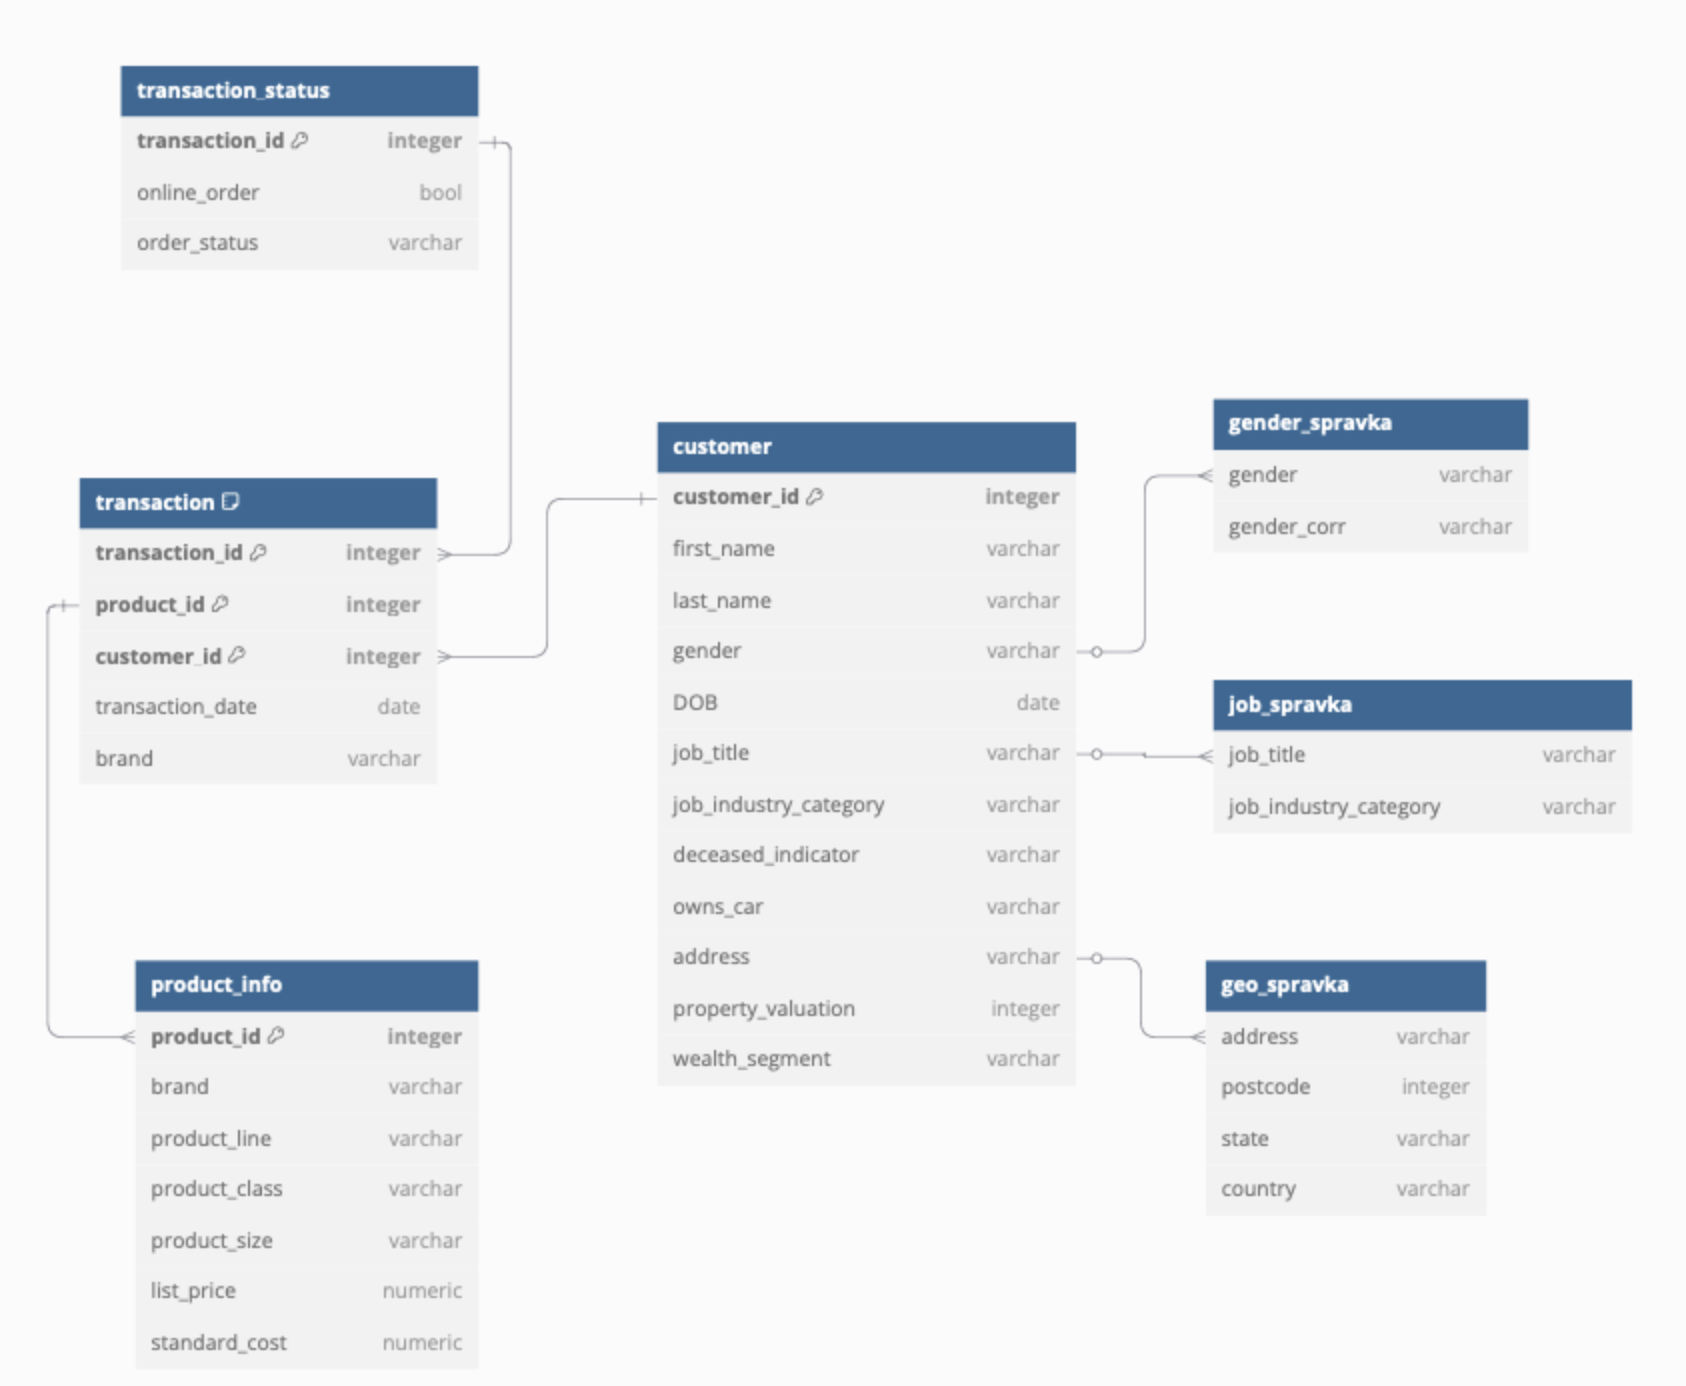

Скрипты формирования таблиц
CREATE TABLE gender_spravka (
    gender       VARCHAR(50) NOT NULL,
    gender_corr  VARCHAR(50),
    PRIMARY KEY (gender)
);

CREATE TABLE job_spravka (
    job_title            VARCHAR(100) NOT NULL,
    job_industry_category VARCHAR(100),
    PRIMARY KEY (job_title, job_industry_category)
);

CREATE TABLE geo_spravka (
    address   VARCHAR(255) NOT NULL,
    postcode  INT,
    state     VARCHAR(100),
    country   VARCHAR(100),
    PRIMARY KEY (address)
);


CREATE TABLE customer (
    customer_id           INT          NOT NULL,
    first_name            VARCHAR(100),
    last_name             VARCHAR(100),
    gender                VARCHAR(50),
    DOB                   DATE,
    job_title             VARCHAR(100),
    job_industry_category VARCHAR(100),
    deceased_indicator    VARCHAR(10),
    owns_car              VARCHAR(10),
    address               VARCHAR(255),
    property_valuation    INT,
    wealth_segment       VARCHAR(100),

    PRIMARY KEY (customer_id),

    -- Справочник пола
    FOREIGN KEY (gender)
        REFERENCES gender_spravka(gender),

    -- Справочник профессии/сферы
    FOREIGN KEY (job_title, job_industry_category)
        REFERENCES job_spravka(job_title, job_industry_category),

    -- Справочник адреса
    FOREIGN KEY (address)
        REFERENCES geo_spravka(address)
);

CREATE TABLE product_info (
    product_id    INT           NOT NULL,
    brand         VARCHAR(100),
    product_line  VARCHAR(100),
    product_class VARCHAR(100),
    product_size  VARCHAR(100),
    list_price    NUMERIC(10,2),
    standard_cost NUMERIC(10,2),

    PRIMARY KEY (product_id)
);

CREATE TABLE transaction (
    transaction_id   INT          NOT NULL,
    product_id       INT          NOT NULL,
    customer_id      INT          NOT NULL,
    transaction_date DATE,
    brand            VARCHAR(100),

    PRIMARY KEY (transaction_id),

    FOREIGN KEY (product_id)
        REFERENCES product_info(product_id),

    FOREIGN KEY (customer_id)
        REFERENCES customer(customer_id)
);

CREATE TABLE transaction_status (
    transaction_id INT          NOT NULL,
    online_order   bool,
    order_status   VARCHAR(50),

    PRIMARY KEY (transaction_id),

    FOREIGN KEY (transaction_id)
        REFERENCES transaction(transaction_id)
);




Далее загружаем стартовые данные в dbeaver и называем их как base \

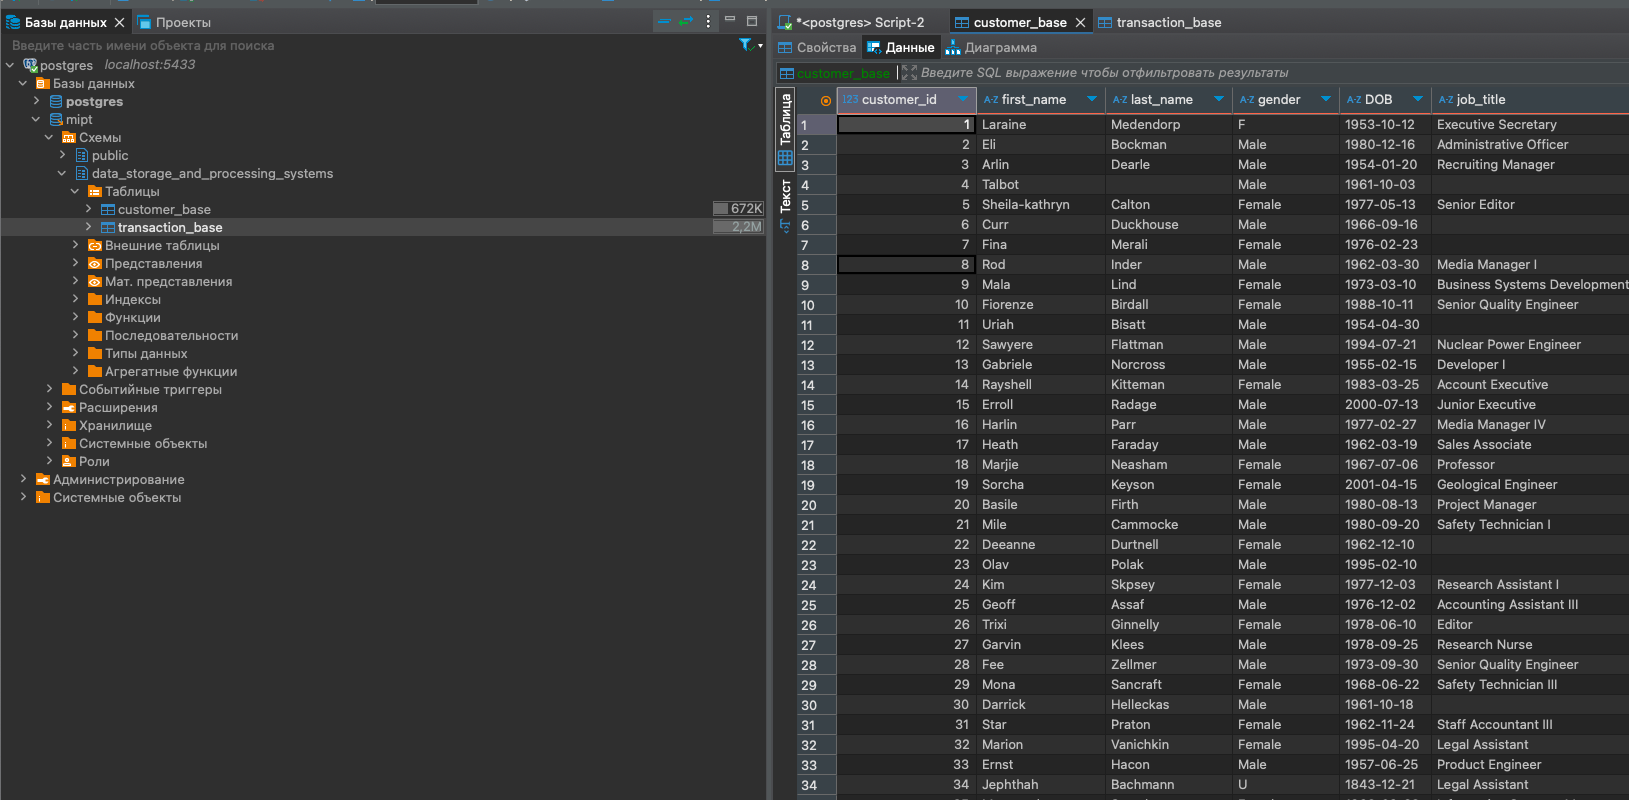

![image-2.png](attachment:image-2.png)

Далее формируем наши таблицы скриптами выше

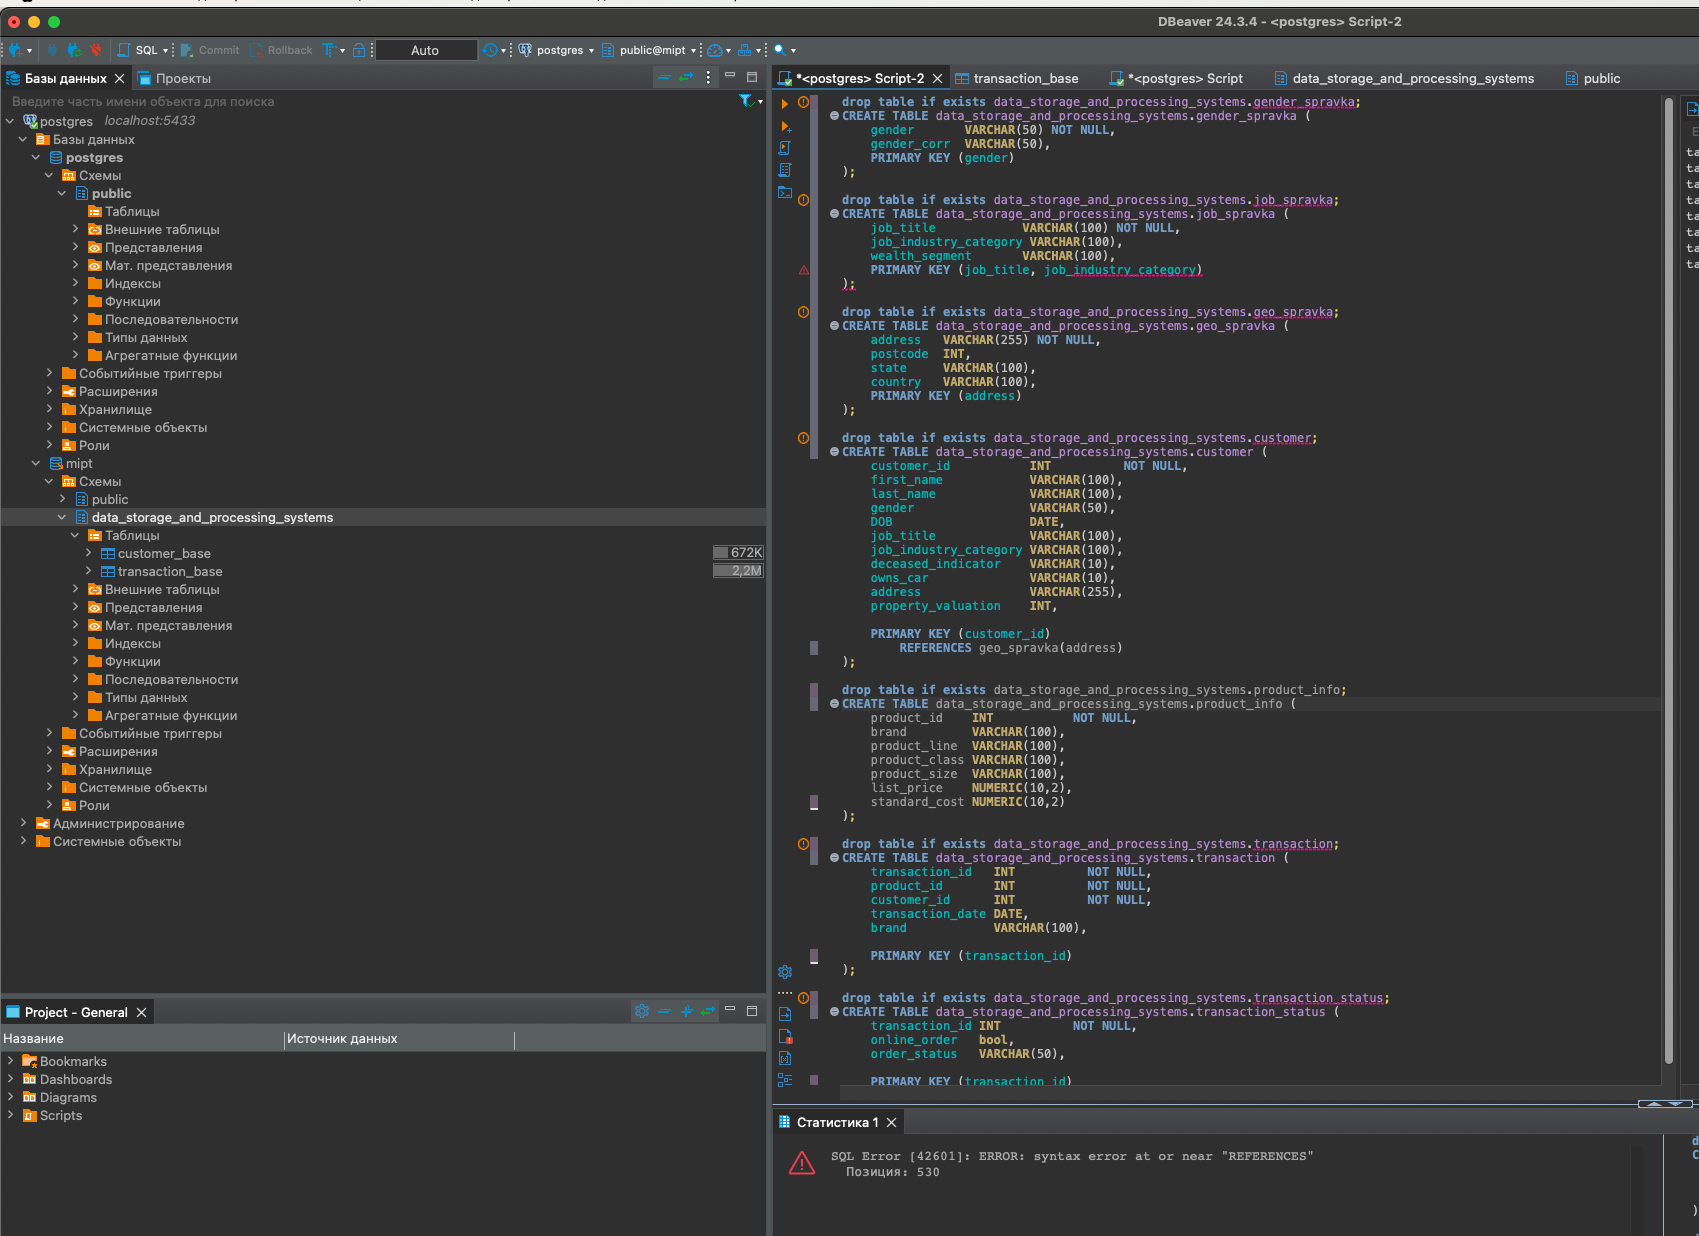

После того как мы создали таблицы нам необходимо загрузить в них данные из базовых

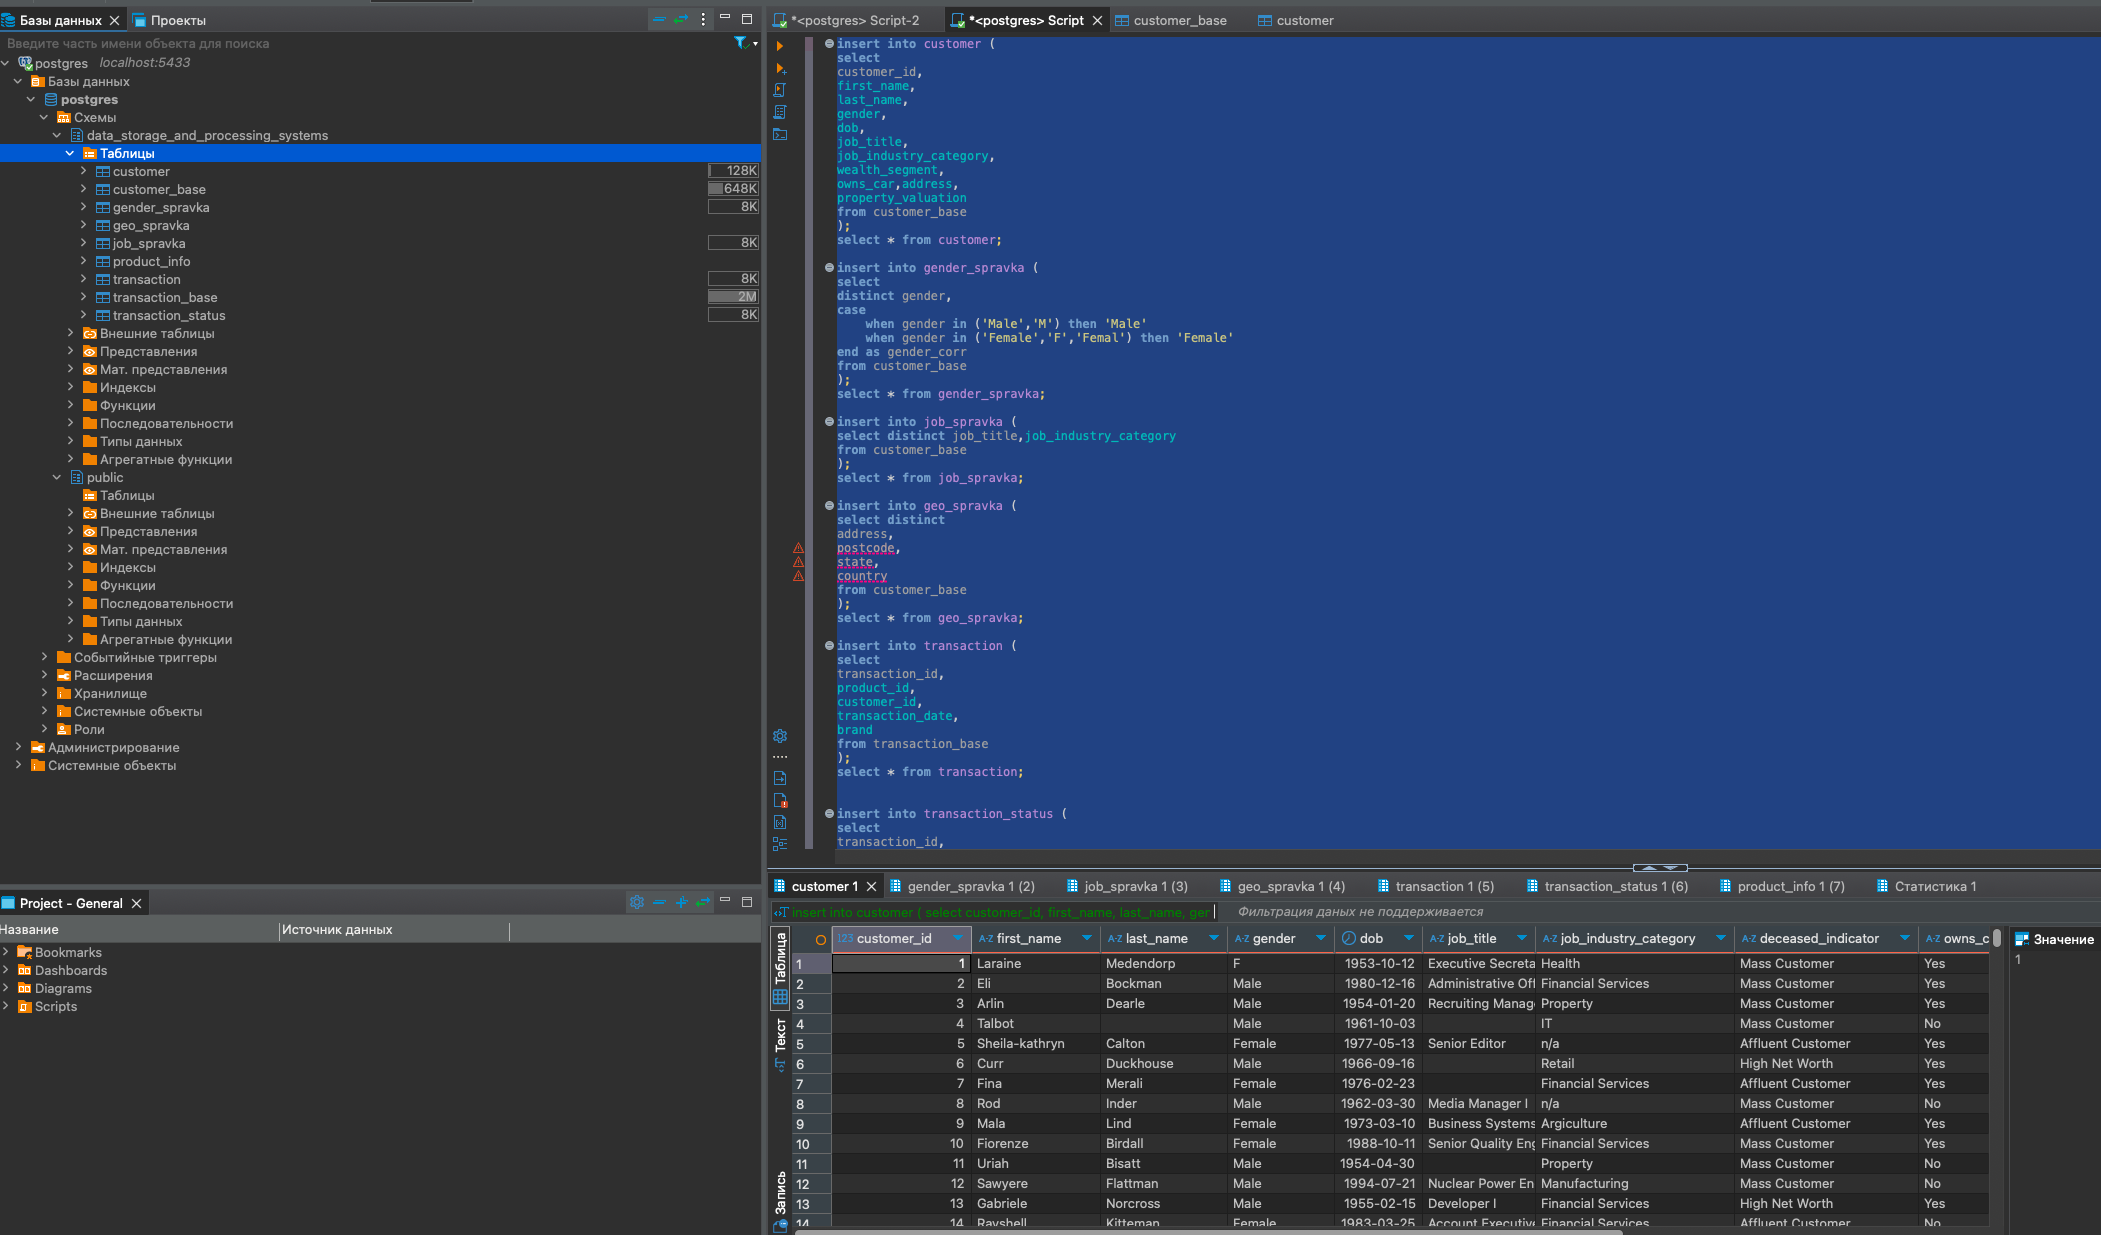

insert into customer (
select 
customer_id,
first_name,
last_name,
gender,
dob,
job_title,
job_industry_category,
wealth_segment,
owns_car,address,
property_valuation
from customer_base
);
select * from customer;

insert into gender_spravka (
select 
distinct gender,
case 
	when gender in ('Male','M') then 'Male'
	when gender in ('Female','F','Femal') then 'Female'
end as gender_corr
from customer_base
);
select * from gender_spravka;

insert into job_spravka (
select distinct job_title,job_industry_category
from customer_base
);
select * from job_spravka;

insert into geo_spravka (
select distinct
address,
postcode,
state,
country
from customer_base
);
select * from geo_spravka;

insert into transaction (
select 
transaction_id,
product_id,
customer_id,
transaction_date,
brand
from transaction_base
);
select * from transaction;


insert into transaction_status (
select 
transaction_id,
online_order,
order_status
from transaction_base
);
select * from transaction_status;

insert into product_info (
select distinct 
product_id,
brand,
product_line,
product_class,
product_size,
list_price,
standard_cost
from transaction_base
);
select * from product_info;


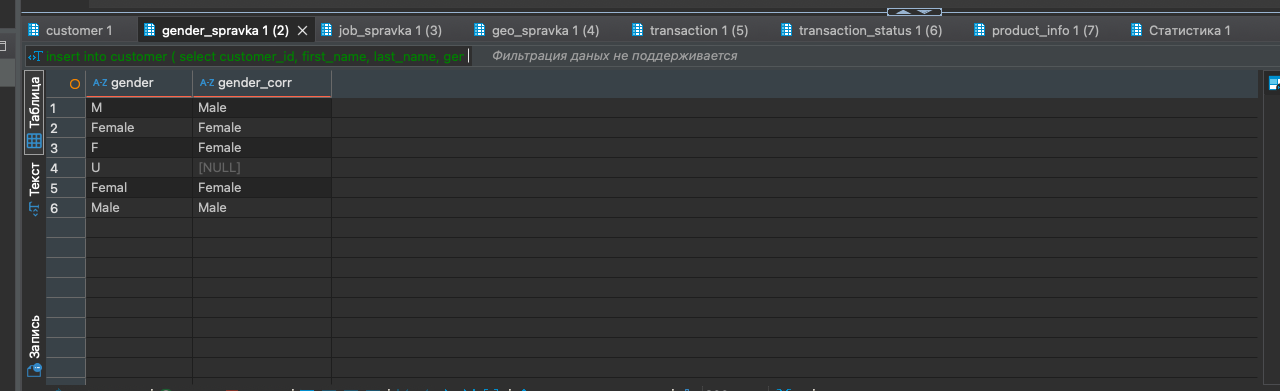

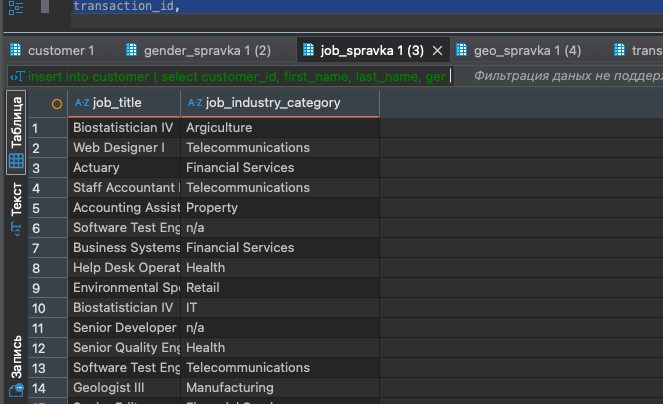

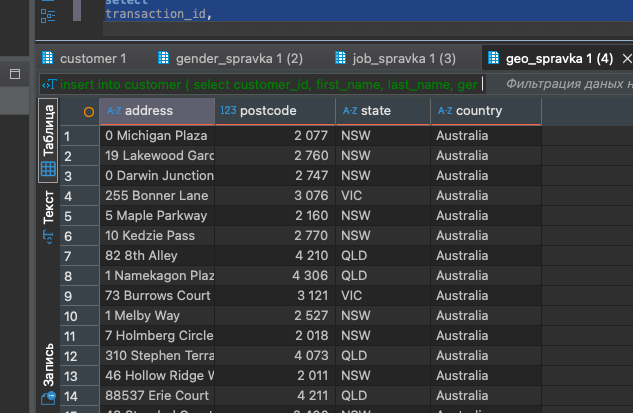

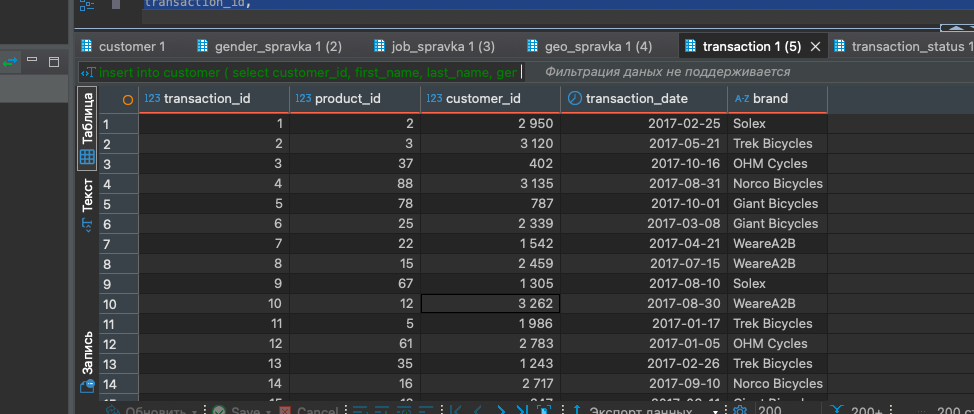

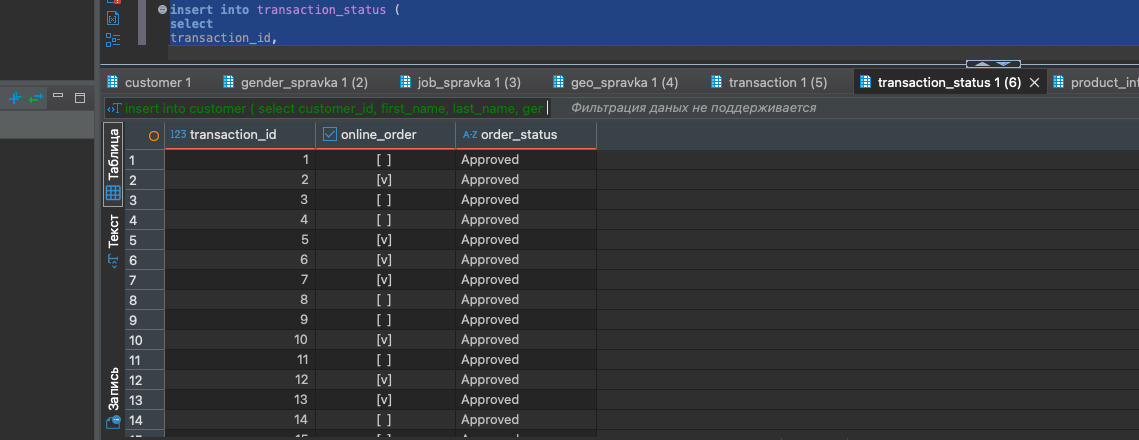

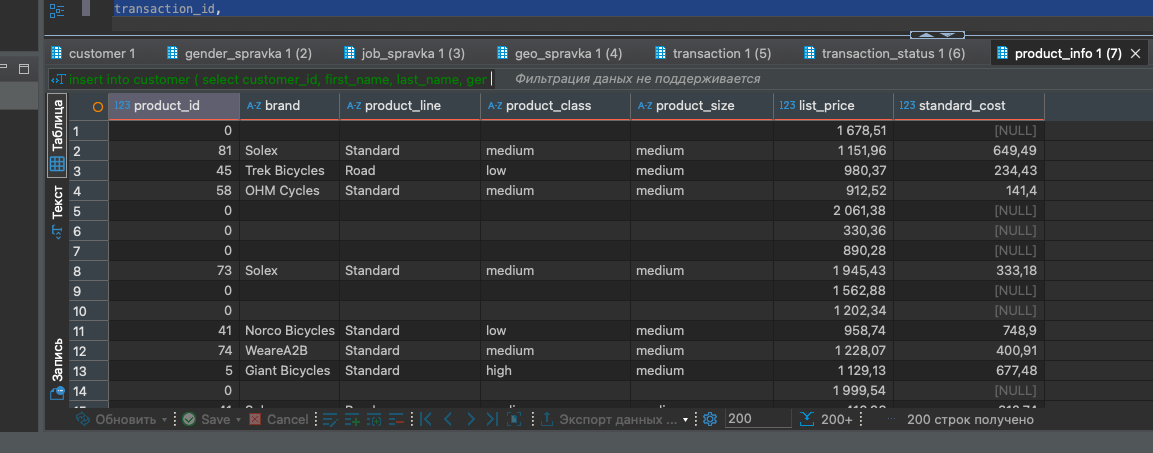